# Финальная работа специализация Data Analyst

Объект исследования:
«СберАвтоподписка» — это сервис долгосрочной аренды автомобилей для физлиц.
Цель исследования:
Проанализировать данные о трафике и поведении пользователей на сайте "СберАвтоподписки" для проверки гипотез и ответа на вопросы продуктовой команды. Задачи включают проверку статистических гипотез о различиях в конверсии (CR) между органическим и платным трафиком, мобильными и десктопными устройствами, а также трафиком из городов присутствия ("Москва", "Санкт-Петербург") и других регионов. Также требуется определить самые эффективные источники трафика, популярные автомобили и целесообразность увеличения рекламного бюджета в социальных сетях.

## 1. Проведение подготовительной работы

In [4]:
# 1.1 Импорт сторонних библиотек
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1.2 Чтение данных
ga_sessions = pd.read_pickle('ga_sessions.pkl') # Данные о сессиях пользователей
ga_hits = pd.read_pickle('ga_hits.pkl') # Данные о событиях внутри сессий


In [6]:
# 1.3. Ознакомление с данными

# Функция для анализа данных
def df_info(data, name):
    """
    Функция для полного анализа DataFrame:
    - Выводит информацию о структуре данных.
    - Показывает размер DataFrame.
    - Выводит типы данных для каждого столбца.
    - Считает процент пропущенных значений с градиентной окраской.
    - Проверяет количество дубликатов.
    - Выводит уникальные значения
    - Предоставляет описательную статистику
    - Выводит общую информацию.

    Параметры:
    - data: DataFrame, который нужно проанализировать.
    - name: Имя DataFrame (для удобства вывода).
    """
     
    print(f"Анализ данных {name}:")
    print('----------------------------------------')
    
    # Ознакомление со структурой данных (первые строки)
    print(f"Первые строки данных {name}:")
    display(data.head())
    print('----------------------------------------')

    # Проверка размеров датафрейма
    print(f"Размер {name}: {data.shape}")
    print('----------------------------------------')

    # Проверка типов данных
    print(f"Типы данных {name}:")
    print(data.dtypes)
    print('----------------------------------------')

    # Проверка на пропущенные значения
    print(f"Процент пропусков в {name}:")
    display(pd.DataFrame(round(data.isna().mean() * 100, 2)).style.background_gradient(cmap='coolwarm', axis=0))
    print('----------------------------------------')

    # Проверка на дубликаты
    duplicates_count = data.duplicated().sum()
    print(f"Количество дубликатов в {name}: {duplicates_count}")
    print('----------------------------------------')

    # Уникальные значения
    print(f"\nУникальные значения в {name}:")
    print(data.nunique())
    print(f"----------------------------------------")
    
    # Описательная статистика
    print(f"\nОписательная статистика для {name}:")
    display(data.describe(include='all'))
    print(f"----------------------------------------")
        
    # Общая информация о DataFrame
    print(f"\nОбщая информация о {name}:")
    print(data.info())
    print('----------------------------------------')


# Применение функции к обоим датафреймам
df_info(ga_sessions, 'ga_sessions')  # Анализ ga_sessions
df_info(ga_hits, 'ga_hits')          # Анализ ga_hits


Анализ данных ga_sessions:
----------------------------------------
Первые строки данных ga_sessions:


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,None,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


----------------------------------------
Размер ga_sessions: (1860042, 18)
----------------------------------------
Типы данных ga_sessions:
session_id                  object
client_id                   object
visit_date                  object
visit_time                  object
visit_number                 int64
utm_source                  object
utm_medium                  object
utm_campaign                object
utm_adcontent               object
utm_keyword                 object
device_category             object
device_os                   object
device_brand                object
device_model                object
device_screen_resolution    object
device_browser              object
geo_country                 object
geo_city                    object
dtype: object
----------------------------------------
Процент пропусков в ga_sessions:


,0
session_id,0.000000
client_id,0.000000
visit_date,0.000000
visit_time,0.000000
visit_number,0.000000
utm_source,0.010000
utm_medium,0.000000
utm_campaign,11.810000
utm_adcontent,18.040000
utm_keyword,58.170000


----------------------------------------
Количество дубликатов в ga_sessions: 0
----------------------------------------

Уникальные значения в ga_sessions:
session_id                  1860042
client_id                   1391719
visit_date                      226
visit_time                    85318
visit_number                    537
utm_source                      293
utm_medium                       56
utm_campaign                    412
utm_adcontent                   286
utm_keyword                    1219
device_category                   3
device_os                        13
device_brand                    206
device_model                    104
device_screen_resolution       5039
device_browser                   57
geo_country                     166
geo_city                       2548
dtype: int64
----------------------------------------

Описательная статистика для ga_sessions:


,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
count,1860042,1860042,1860042,1860042,1.860042e+06,1859945,1860042,1640439,1524427,777981,1860042,789904,1741364,16338,1860042,1860042,1860042,1860042
unique,1860042,1391719,226,85318,NaN,293,56,412,286,1219,3,13,206,104,5039,57,166,2548
top,9055434745589932991.1637753792.1637753792,1750498477.1629450062,2021-05-24,12:00:00,NaN,ZpYIoDJMcFzVoPFsHGJL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Apple,AuMdmADEIoPXiWpTsBEj,414x896,Chrome,Russia,Moscow
freq,1,462,39453,61067,NaN,578290,552272,463481,1006599,506819,1474871,464054,551088,9778,169090,1013436,1800565,805329
mean,NaN,NaN,NaN,NaN,2.712804e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.182907e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------

Общая информация о ga_sessions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,None
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,None
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,None
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,None
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,None


----------------------------------------
Размер ga_hits: (15726470, 11)
----------------------------------------
Типы данных ga_hits:
session_id         object
hit_date           object
hit_time          float64
hit_number          int64
hit_type           object
hit_referer        object
hit_page_path      object
event_category     object
event_action       object
event_label        object
event_value        object
dtype: object
----------------------------------------
Процент пропусков в ga_hits:


,0
session_id,0.000000
hit_date,0.000000
hit_time,58.250000
hit_number,0.000000
hit_type,0.000000
hit_referer,39.900000
hit_page_path,0.000000
event_category,0.000000
event_action,0.000000
event_label,23.910000


----------------------------------------
Количество дубликатов в ga_hits: 0
----------------------------------------

Уникальные значения в ga_hits:
session_id        1734610
hit_date              226
hit_time           925887
hit_number            500
hit_type                1
hit_referer         37873
hit_page_path      342715
event_category         52
event_action          230
event_label         39825
event_value             0
dtype: int64
----------------------------------------

Описательная статистика для ga_hits:


,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
count,15726470,15726470,6.566148e+06,1.572647e+07,15726470,9451666,15726470,15726470,15726470,11966286,0
unique,1734610,226,NaN,NaN,1,37873,342715,52,230,39825,0
top,5442565791571325612.1632449195.1632449195,2021-05-24,NaN,NaN,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,card_web,view_card,KclpemfoHstknWHFiLit,NaN
freq,768,513035,NaN,NaN,15726470,8879187,2793639,7456998,3558985,6505447,NaN
mean,NaN,NaN,2.091050e+05,2.356715e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,4.032110e+05,2.887713e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.412000e+04,7.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.994100e+04,1.500000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.195352e+05,2.900000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------

Общая информация о ga_hits:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ GB
None
----------------------------------------


## 2. Проведение разведочного анализа данных

In [10]:
# 2.1 Базовая чистка
# Удаление дубликатов не требуется, так как при проведении проверки их значение равно 0

# 2.1.1. Удаление ненужных колонок
# Удаляем столбцы с большим количеством пропусков или неважными для анализа
ga_sessions.drop(columns=['utm_adcontent', 'utm_keyword', 'device_screen_resolution', 'device_os', 'device_model'], inplace=True)
ga_hits.drop(columns=['hit_time', 'hit_referer', 'event_label', 'event_value'], inplace=True)

# 2.1.2. Заполнение пропусков
# Заполняем пропущенные значения значением "Unknown"
sessions_fill_columns = ['utm_source', 'utm_campaign', 'device_brand']
ga_sessions[sessions_fill_columns] = ga_sessions[sessions_fill_columns].fillna('Unknown')

# 2.1.3. Преобразование типов данных
# Преобразуем даты и время в корректные форматы для дальнейшего анализа
ga_sessions['visit_date'] = pd.to_datetime(ga_sessions['visit_date'])
ga_sessions['visit_time'] = pd.to_datetime(ga_sessions['visit_time'], format='%H:%M:%S')
ga_hits['hit_date'] = pd.to_datetime(ga_hits['hit_date'])


In [13]:
# 2.2 Распределение ключевых атрибутов, их отношения

# 2.2.1. Создание дополнительных признаков

# 2.2.1.1. Определение целевых событий
# Целевыми событиями считаются действия типа "Оставить заявку" или "Заказать звонок"
target_actions = [
    'sub_car_claim_click', 'sub_car_claim_submit_click', 
    'sub_open_dialog_click', 'sub_custom_question_submit_click', 
    'sub_call_number_click', 'sub_callback_submit_click', 
    'sub_submit_success', 'sub_car_request_submit_click'
]

# 2.2.1.2. Фильтруем только целевые события из ga_hits
target_events = ga_hits[ga_hits['event_action'].isin(target_actions)]

# 2.2.1.3. Добавление флага для целевых событий в ga_sessions
# Создаем новый столбец is_target, который равен 1, если сессия содержит хотя бы одно целевое действие
ga_sessions['is_target'] = ga_sessions['session_id'].isin(target_events['session_id']).astype(int)

# 2.2.1.4. Определение органического и платного трафика
# Делим трафик на органический и платный в зависимости от utm_medium
ga_sessions['traffic_type'] = ga_sessions['utm_medium'].apply(
    lambda x: 'organic' if x in ['organic', 'referral', '(none)'] else 'paid'
)

# 2.2.1.5. Определение мобильных и десктопных устройств
# Классифицируем устройства как mobile или desktop
ga_sessions['device_group'] = ga_sessions['device_category'].apply(
    lambda x: 'mobile' if x == 'mobile' else 'desktop'
)

# 2.2.1.6. Определение городов присутствия (Москва и область, Санкт-Петербург)
# Классифицируем трафик по географии: presence (города присутствия) или other (остальные регионы)
presence_cities = ['Moscow', 'Saint Petersburg']
ga_sessions['city_group'] = ga_sessions['geo_city'].apply(
    lambda x: 'presence' if x in presence_cities else 'other'
)


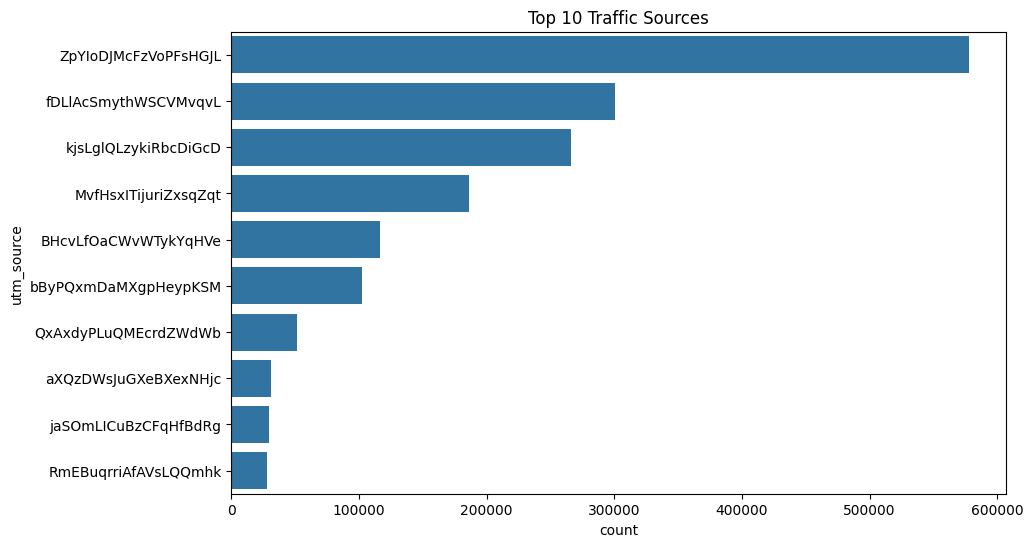

In [15]:
# 2.2.2. Разведочный анализ данных (EDA)

# 2.2.2.1. Распределение трафика по источникам
# Строим график топ-10 источников трафика
plt.figure(figsize=(10, 6))
sns.countplot(data=ga_sessions, y='utm_source', order=ga_sessions['utm_source'].value_counts().index[:10])
plt.title('Top 10 Traffic Sources')
plt.show()


device_group
mobile     79.292349
desktop    20.707651
Name: proportion, dtype: float64


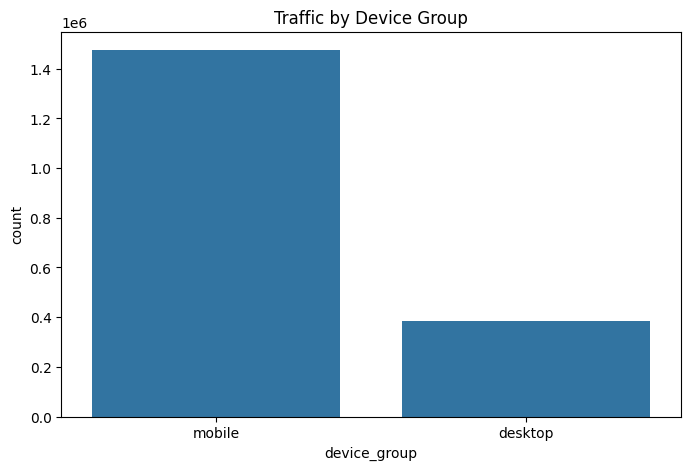

In [17]:
# 2.2.2.2. Распределение трафика по типу устройства
# Вычисляем долю мобильного и десктопного трафика
device_group_counts = ga_sessions['device_group'].value_counts(normalize=True) * 100
print(device_group_counts)
# Строим график распределения трафика по устройствам
plt.figure(figsize=(8, 5))
sns.countplot(data=ga_sessions, x='device_group')
plt.title('Traffic by Device Group')
plt.show()


city_group
presence    59.252264
other       40.747736
Name: proportion, dtype: float64


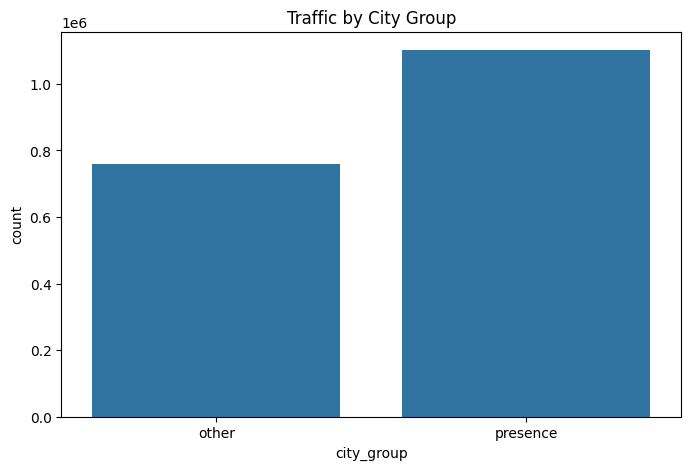

In [19]:
# 2.2.2.3. Распределение трафика по городам присутствия
# Вычисляем долю трафика из городов присутствия и других регионов
city_group_counts = ga_sessions['city_group'].value_counts(normalize=True) * 100
print(city_group_counts)
# Строим график распределения трафика по городам
plt.figure(figsize=(8, 5))
sns.countplot(data=ga_sessions, x='city_group')
plt.title('Traffic by City Group')
plt.show()


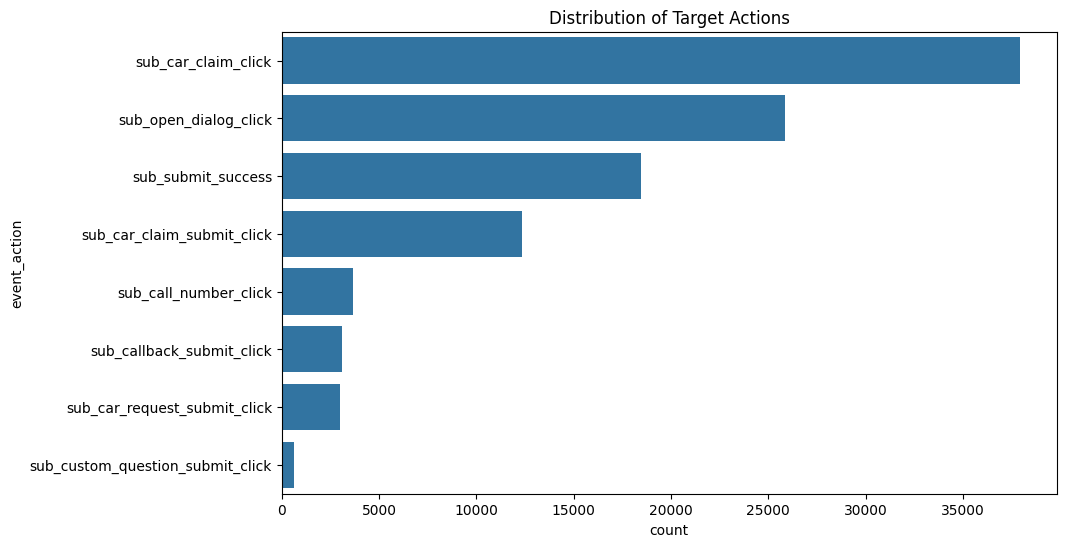

In [23]:
# 2.2.2.4. Распределение целевых действий
# Строим график распределения типов целевых действий
plt.figure(figsize=(10, 6))
sns.countplot(data=target_events, y='event_action', order=target_events['event_action'].value_counts().index)
plt.title('Distribution of Target Actions')
plt.show()


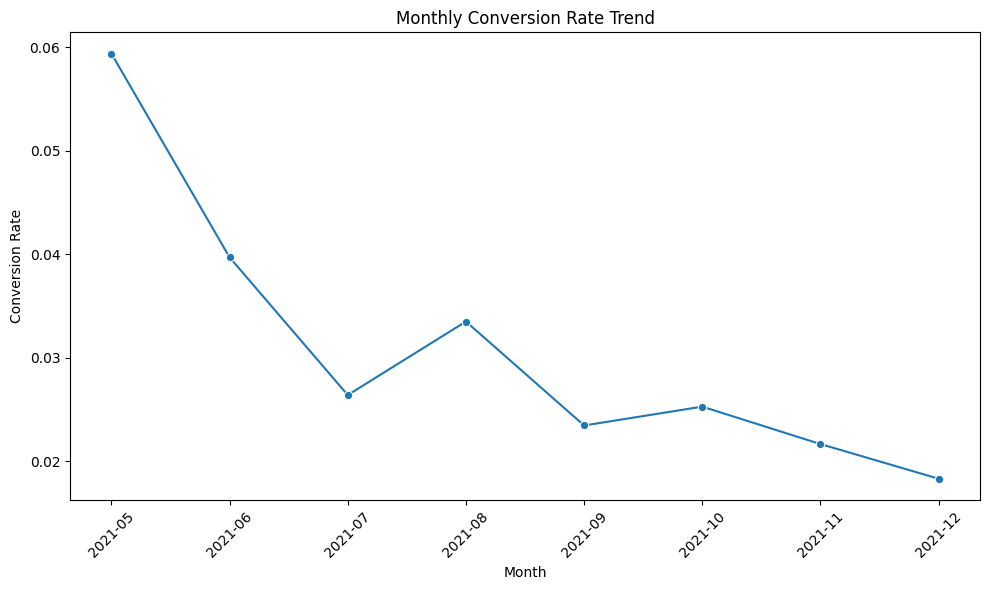

In [25]:
# 2.2.2.5. Тренды по времени: Конверсия по месяцам
# Группируем данные по месяцам и вычисляем конверсию
ga_sessions['visit_month'] = ga_sessions['visit_date'].dt.to_period('M') # Извлекаем месяц из даты
monthly_conversion = (
    ga_sessions.groupby('visit_month')['is_target']
    .agg(['sum', 'count']) # sum - количество конверсий, count - общее количество сессий
    .reset_index()
    .rename(columns={'sum': 'conversions', 'count': 'total'})
)
# Рассчитываем коэффициент конверсии (CR) для каждого месяца
monthly_conversion['conversion_rate'] = monthly_conversion['conversions'] / monthly_conversion['total']
# Преобразование visit_month в строковый формат для корректной визуализации
monthly_conversion['visit_month_str'] = monthly_conversion['visit_month'].astype(str)
# Строим график тренда конверсии по месяцам
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_conversion, x='visit_month_str', y='conversion_rate', marker='o')
plt.title('Monthly Conversion Rate Trend')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)  # Поворот меток оси X для лучшей читаемости
plt.tight_layout()  # Автоматическая настройка отступов графика
plt.show()


## 3. Выполнение задания согласно специализации

### 3.1 Проверка гипотез

In [29]:
# 3.1.1. Гипотеза 1: Органический трафик не отличается от платного с точки зрения CR

# Агрегация данных по типу трафика
organic_traffic = ga_sessions[ga_sessions['traffic_type'] == 'organic'] # Органический трафик
paid_traffic = ga_sessions[ga_sessions['traffic_type'] == 'paid'] # Платный трафик

organic_conversions = organic_traffic['is_target'].sum() # Количество конверсий среди органического трафика
paid_conversions = paid_traffic['is_target'].sum() # Количество конверсий среди платного трафика

organic_total = len(organic_traffic) # Общее количество сессий среди органического трафика
paid_total = len(paid_traffic) # Общее количество сессий среди платного трафика

# Создаем таблицу сопряженности для хи-квадрат теста
contingency_table = [
    [organic_total - organic_conversions, organic_conversions],
    [paid_total - paid_conversions, paid_conversions]
]

# Проводим хи-квадрат тест
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Выводим результаты теста
print(f"Гипотеза 1: p-value = {p_value}")
if p_value < 0.05:
    print("Органический трафик отличается от платного с точки зрения CR.")
else:
    print("Органический трафик не отличается от платного с точки зрения CR.")
    

Гипотеза 1: p-value = 0.0
Органический трафик отличается от платного с точки зрения CR.


p-value = 0.0 : Это значение значительно меньше порогового уровня значимости (0.05).  
Следовательно, мы отвергаем нулевую гипотезу о том, что органический трафик не отличается от платного с точки зрения показателя конверсии (CR).
Органический трафик и платный трафик имеют статистически значимые различия  по показателю конверсии (CR). Для принятия решений важно выяснить, какой из этих типов трафика демонстрирует более высокую конверсию, и сконцентрироваться на его оптимизации или расширении.     

In [31]:
# 3.1.2. Гипотеза 2: Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR

# Агрегация данных по типу устройства
mobile_traffic = ga_sessions[ga_sessions['device_group'] == 'mobile'] # Мобильный трафик
desktop_traffic = ga_sessions[ga_sessions['device_group'] == 'desktop'] # Десктопный трафик

mobile_conversions = mobile_traffic['is_target'].sum() # Количество конверсий среди мобильного трафика
desktop_conversions = desktop_traffic['is_target'].sum() # Количество конверсий среди десктопного трафика

mobile_total = len(mobile_traffic) # Общее количество сессий среди мобильного трафика
desktop_total = len(desktop_traffic) # Общее количество сессий среди десктопного трафика

# Создаем таблицу сопряженности для хи-квадрат теста
contingency_table = [
    [mobile_total - mobile_conversions, mobile_conversions],
    [desktop_total - desktop_conversions, desktop_conversions]
]

# Проводим хи-квадрат тест
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Выводим результаты теста
print(f"Гипотеза 2: p-value = {p_value}")
if p_value < 0.05:
    print("Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR.")
else:
    print("Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR.")


Гипотеза 2: p-value = 4.0959028813400505e-64
Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR.


p-value = 4.0959028813400505e-64 : Это значение значительно меньше порогового уровня значимости (0.05).  
Следовательно, мы отвергаем нулевую гипотезу о том, что трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения показателя конверсии (CR).
Трафик с мобильных устройств и трафик с десктопных устройств статистически значимо различаются  по показателю конверсии (CR). Для принятия окончательных решений важно выяснить, какой тип устройств обеспечивает более высокий CR, и сконцентрироваться на оптимизации соответствующих аспектов пользовательского опыта. Если мобильный CR ниже, необходимо провести глубокий анализ причин и предпринять меры для его повышения.     

In [33]:
# 3.1.3. Гипотеза 3: Трафик из городов присутствия не отличается от трафика из иных регионов с точки зрения CR

# Агрегация данных по городам присутствия
presence_traffic = ga_sessions[ga_sessions['city_group'] == 'presence'] # Трафик из городов присутствия
other_traffic = ga_sessions[ga_sessions['city_group'] == 'other'] # Трафик из других регионов

presence_conversions = presence_traffic['is_target'].sum() # Количество конверсий среди трафика из городов присутствия
other_conversions = other_traffic['is_target'].sum() # Количество конверсий среди трафика из других регионов

presence_total = len(presence_traffic) # Общее количество сессий среди трафика из городов присутствия
other_total = len(other_traffic) # Общее количество сессий среди трафика из других регионов

# Создаем таблицу сопряженности для хи-квадрат теста
contingency_table = [
    [presence_total - presence_conversions, presence_conversions],
    [other_total - other_conversions, other_conversions]
]

# Проводим хи-квадрат тест
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Выводим результаты теста
print(f"Гипотеза 3: p-value = {p_value}")
if p_value < 0.05:
    print("Трафик из городов присутствия отличается от трафика из иных регионов с точки зрения CR.")
else:
    print("Трафик из городов присутствия не отличается от трафика из иных регионов с точки зрения CR.")


Гипотеза 3: p-value = 1.2513540198538648e-17
Трафик из городов присутствия отличается от трафика из иных регионов с точки зрения CR.


p-value = 1.2513540198538648e-17 : Это значение значительно меньше порогового уровня значимости (0.05).
Следовательно, мы отвергаем нулевую гипотезу о том, что трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения показателя конверсии (CR).
Трафик из городов присутствия (Москва, область, Санкт-Петербург) и трафик из других регионов статистически значимо различаются  по показателю конверсии (CR). Для принятия окончательных решений важно выяснить, какой тип трафика демонстрирует более высокий CR, и сконцентрироваться на его оптимизации или расширении. Если конверсия из городов присутствия выше, следует усилить маркетинговые усилия именно в этих регионах.     

### 3.2 Ответьте на вопросы продуктовой команды

               utm_source  conversion_rate
149  YpBKcihLLfFjWuxOLfvW         1.000000
185  fJCYsujgSxIHFbOmgDdN         0.875000
139  XzfzEBYZWgSDtJNXOadn         0.500000
17   CqeIpFwJscTsZoYXdHsP         0.500000
288  yxJKymlSGVuKIPTxbysx         0.333333
64   LIWKeifdTCbuNeniIUqm         0.298246
56   JcVHXwVSrnfIuOMMEkrJ         0.250000
202  hIlpdXTVGwzYWIOqvhtN         0.200000
204  hONgZhBaHwLGhvJSefNE         0.200000
215  juYouSPHPfKdXivEPJjt         0.166667


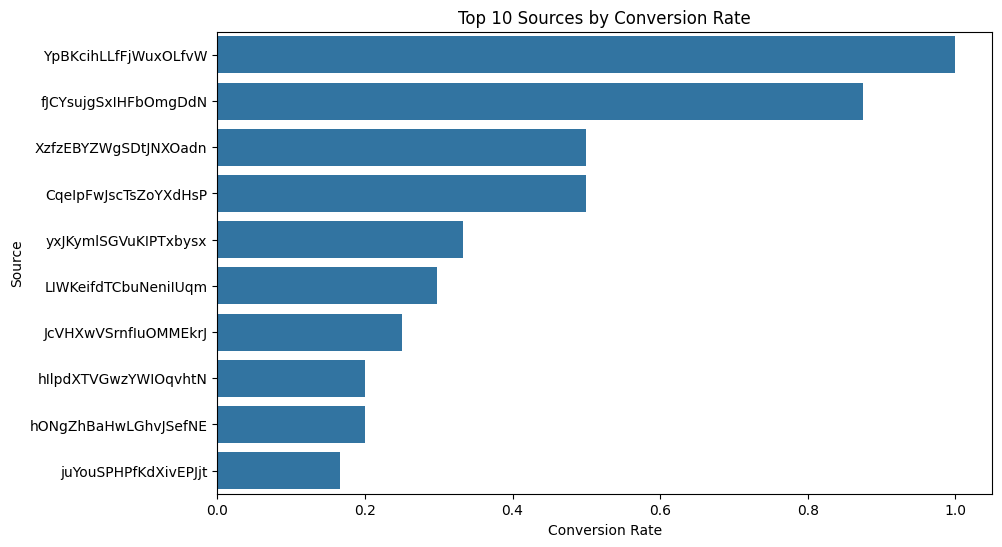

In [36]:
# 3.2.1. Из каких источников к нам идет самый целевой трафик?

# Вычисляем конверсию для каждого источника трафика
source_conversion_rate = (
    ga_sessions.groupby('utm_source')['is_target']
    .agg(['sum', 'count']) # sum - количество конверсий, count - общее количество сессий
    .reset_index()
    .rename(columns={'sum': 'conversions', 'count': 'total'})
)

# Рассчитываем коэффициент конверсии (CR) для каждого источника
source_conversion_rate['conversion_rate'] = source_conversion_rate['conversions'] / source_conversion_rate['total']

# Вывод топ-10 источников по конверсии
top_sources = source_conversion_rate.sort_values(by='conversion_rate', ascending=False).head(10)
print(top_sources[['utm_source', 'conversion_rate']])

# Строим график топ-10 источников по CR
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sources, y='utm_source', x='conversion_rate', order=top_sources.sort_values('conversion_rate', ascending=False).utm_source)
plt.title('Top 10 Sources by Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Source')
plt.show()


      car_info  conversion_rate
6       hawtai         1.000000
18       smart         0.250000
9     infiniti         0.057325
19       tesla         0.031250
21         uaz         0.027778
8      hyundai         0.022447
7        honda         0.013889
2     cadillac         0.013699
22  volkswagen         0.012047
10         kia         0.011373


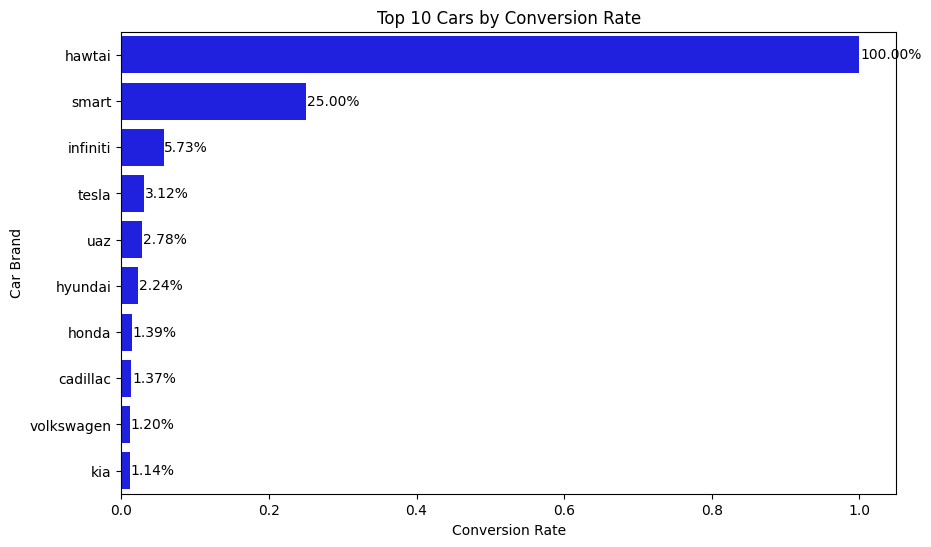

In [61]:
# 3.2.2. Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR?

# Функция для извлечения информации о машинах
# Используется регулярное выражение для извлечения марки автомобиля из hit_page_path
def extract_car_info(hit_page_path):
    match = re.search(r'/cars(?:/all)?/([^/?&]+)', hit_page_path)  # Ищем марку автомобиля после '/cars/'
    if match:
        car_name = match.group(1)  # Извлекаем найденное имя
        # Проверяем, что имя содержит только буквы (для исключения чисел и символов)
        if re.fullmatch(r'[a-zA-Z]+', car_name):
            return car_name
    return None

# Применяем функцию к данным для целевых событий
# Используем .loc для явного изменения оригинального DataFrame
target_events.loc[:, 'car_info'] = target_events['hit_page_path'].apply(extract_car_info)
target_events = target_events.dropna(subset=['car_info'])  # Удаляем строки без информации о машине

# Подсчет конверсий для каждой марки автомобиля
car_conversion_rate = (
    target_events.groupby('car_info')['event_action']
    .agg(['count'])  # count - количество целевых событий
    .reset_index()
    .rename(columns={'count': 'conversions'})
)

# Общее количество просмотров для каждой машины
car_views = (
    ga_hits[~ga_hits['hit_page_path'].isnull()]
    .assign(car_info=ga_hits['hit_page_path'].apply(extract_car_info))  # Применяем ту же функцию для ga_hits
    .dropna(subset=['car_info'])  # Удаляем строки без информации о машине
    .groupby('car_info')['hit_page_path']
    .count()  # count - общее количество просмотров
    .reset_index()
    .rename(columns={'hit_page_path': 'views'})
)

# Слияние данных о конверсии и просмотрах
car_data = car_conversion_rate.merge(car_views, on='car_info', how='inner')  # Inner merge для объединения данных

# Расчет коэффициента конверсии (CR) для каждой марки автомобиля
car_data['conversion_rate'] = car_data['conversions'] / car_data['views']

# Выводим топ-10 машин по конверсии
top_cars_by_cr = car_data.sort_values(by='conversion_rate', ascending=False).head(10)
print(top_cars_by_cr[['car_info', 'conversion_rate']])

# Строим график топ-10 машин по CR
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_cars_by_cr, 
    x='conversion_rate', 
    y='car_info', 
    color='blue'
)
plt.title('Top 10 Cars by Conversion Rate')
plt.xlabel('Conversion Rate')
plt.ylabel('Car Brand')
# Добавляем значения рядом со столбцами для лучшей интерпретации
for index, value in enumerate(top_cars_by_cr['conversion_rate']):
    plt.text(value + 0.001, index, f'{value:.2%}', va='center', ha='left', fontsize=10, color='black')
plt.show()


Конверсия из социальных сетей: 1.47%
Общая конверсия: 2.70%


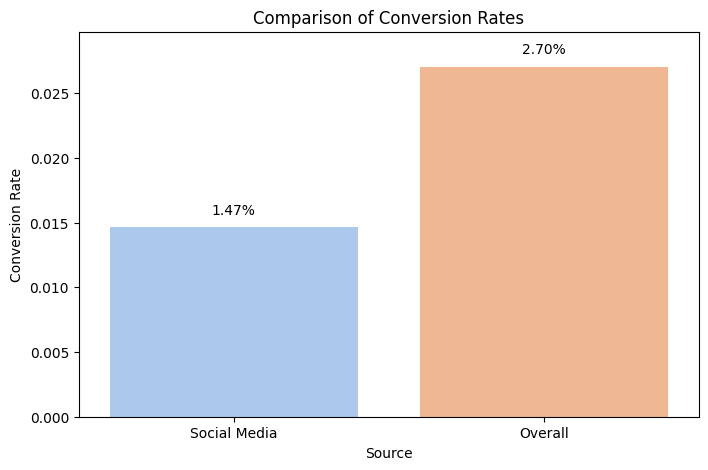

Социальные сети не дают преимущества в плане CR.


In [40]:
# 3.2.3. Стоит ли увеличивать присутствие в соцсетях?

# Фильтрация трафика из социальных сетей
social_media_sources = [
    'QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 
    'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo', 
    'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'
]
social_media_traffic = ga_sessions[ga_sessions['utm_source'].isin(social_media_sources)]  # Трафик из соцсетей

# Конверсия из социальных сетей
social_media_conversions = social_media_traffic['is_target'].sum()  # Количество конверсий среди трафика из соцсетей
social_media_total = len(social_media_traffic)  # Общее количество сессий среди трафика из соцсетей
social_media_cr = social_media_conversions / social_media_total if social_media_total > 0 else 0  # CR для соцсетей

# Общая конверсия
overall_conversions = ga_sessions['is_target'].sum()  # Количество конверсий среди всего трафика
overall_total = len(ga_sessions)  # Общее количество сессий среди всего трафика
overall_cr = overall_conversions / overall_total if overall_total > 0 else 0  # Общий CR

# Выводим результаты
print(f"Конверсия из социальных сетей: {social_media_cr:.2%}")
print(f"Общая конверсия: {overall_cr:.2%}")

# Создаем DataFrame для визуализации
data = pd.DataFrame({
    'Source': ['Social Media', 'Overall'],
    'Conversion Rate': [social_media_cr, overall_cr]
})

# Строим график сравнения конверсии
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Source', y='Conversion Rate', hue='Source', palette='pastel', legend=False)
plt.title('Comparison of Conversion Rates')
plt.ylabel('Conversion Rate')
plt.ylim(0, max(data['Conversion Rate']) * 1.1)  # Установка лимита оси Y
for i, value in enumerate(data['Conversion Rate']):
    plt.text(i, value + 0.001, f'{value:.2%}', ha='center', fontsize=10)  # Добавление значений над столбцами
plt.show()

# Интерпретация результатов
if social_media_cr > overall_cr:
    print("Социальные сети дают более высокий CR, стоит увеличивать присутствие.")
else:
    print("Социальные сети не дают преимущества в плане CR.")


Конверсия из социальных сетей составляет 1.47% .
Общая конверсия составляет 2.70% .
Поскольку конверсия из социальных сетей ниже общей конверсии, можно сделать вывод, что увеличение присутствия в социальных сетях не даст значительного эффекта с точки зрения конверсии. Однако это не означает, что социальные сети бесполезны — они могут быть полезны для других метрик, таких как брендирование или увеличение узнаваемости.    